# 선형 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## k-최근접 이웃의 한계
 - 훈련 세트 범위 밖의 범위의 샘플을 예측할 수 X

In [3]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
print('perch_length.shape : ', perch_length.shape)
print('perch_weight.shape : ', perch_weight.shape)

perch_length.shape :  (56,)
perch_weight.shape :  (56,)


In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print('train_input[34] : ', train_input[34])
print('train_target[34] : ', train_target[34])

train_input[34] :  [44.]
train_target[34] :  1000.0


In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(knr.predict([[50]])) # 길이가 50인 농어의 무게 예측 

[1033.33333333]


In [6]:
import matplotlib.pyplot as plt

indexes :  [[34  8 14]]
distances :  [[6. 7. 7.]]
train_input[34] :  [44.]
train_target[34] :  1000.0


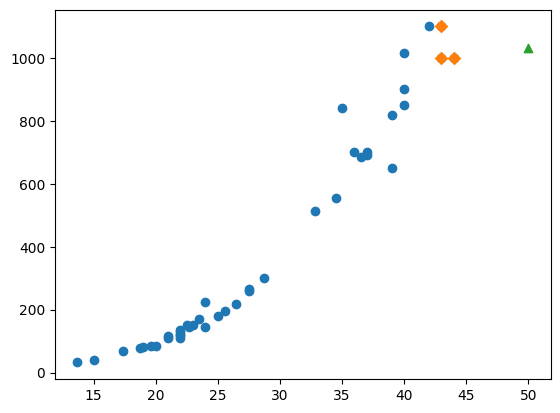

In [7]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])
print('indexes : ', indexes)
print('distances : ', distances)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
print('train_input[34] : ', train_input[34])
print('train_target[34] : ', train_target[34])
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
print(knr.predict([[100]]))

[1033.33333333]


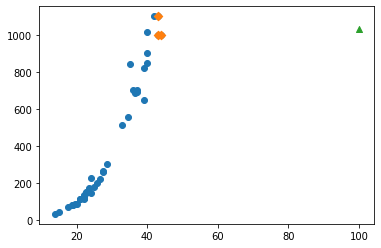

In [33]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.show()

# 이런식이면 농어가 아무리 커도 무게가 더 늘어나지 않겠다.
# k최근접 말고 다른 알고리즘으로 이 문제를 해결할 수 있다.

## 선형 회귀

#### k-최근접 이웃의 한계
 - 훈련 세트 범위 밖의 범위의 샘플을 예측할 수 X
 - 이를 해결하려고 직선(영원히 직선)의 방정식을 찾았음.
 - 가장 잘 맞는 직선의 방정식을 찾는다는 것은 = 최적의 기울기와 y절편을 찾는다는 것.
     이는 coef_와 intercept_속성에 저장되어있다.
#### 선형 회귀의 한계
- 하지만 모든 데이터들이 직선에 가깝게 부합할 수는 없는 법
- 직선에 부합하지 않아서 정확도가 떨어지니, 다항회귀로 발전
 

In [0]:
from sklearn.linear_model import LinearRegression
# 특성이 한개라서 직선을 학습하는 알고리즘.

In [35]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [37]:
print(lr.coef_, lr.intercept_)# 기울기, y절편

[39.01714496] -709.0186449535477


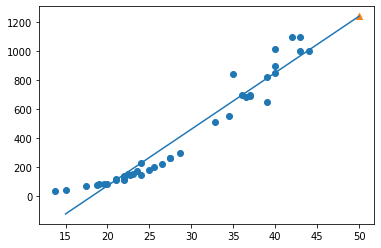

In [38]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [39]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # 전체적으로 과소적합? ㅇㅇ

0.9398463339976039
0.8247503123313558


## 다항 회귀

 - 위 그래프를 보면, 직선이라기엔 곡선에 가깝고, 직선대로 예측한다면 농어의 무게가 0g이하로 내려갈텐데 현실에선 있을 수 없는 일이다.
 - 최적의 직선을 찾기보단 최적의 곡선을 찾아라.
 - 결과적으로 훈련 세트와 테스트 세트의 성능이 훨씬 높아졌다.
        - 하지만, 훈련 세트 성능보다 테스트 세트 성능이 조금 높은 것으로 보아 과소적합된 경향이 조금 남아있다. 더 복잡한 모델을 만들어 이 문제를 해결해야 한다.
 

In [8]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [9]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [42]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
# 훈련세트에 제곱항을 추가했지만, 타겟값은 그대로인데?
# 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.
# 테스트할 때는 이 모델에 농어 길이의 제곱과 원래 길이를 함께 넣어줘야 한다.

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [43]:
print(lr.coef_, lr.intercept_) # 2차방정식도 선형회귀로 볼 수 있다.
                                # 다항식을 사용한 선형회귀 = 다항회귀

[  1.01433211 -21.55792498] 116.0502107827827


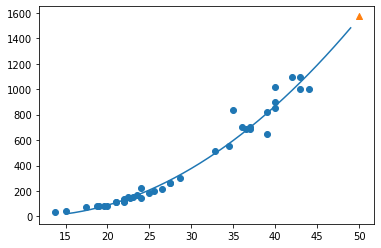

In [44]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [45]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 선형회귀로는 훈련, 테스트 세트 둘다 과소적합이었는데
# 이걸 다항회귀로 2차방정식(제곱한 열을 하나 더 만들어주고, 대신 테스트값은 건들지X)
# 을 만들고, 다시 fit 훈련 시켜주었더니 훈련,테스트값 둘다 더 정확도가 높이 나올 수 있었다.

0.9706807451768623
0.9775935108325122
